In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from  utils import *

# Informações Gerais

In [4]:
path = "DadosRebeca.csv"
df = pd.read_csv(path)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       2458 non-null   int64  
 1   Unnamed: 0         2458 non-null   int64  
 2   NOME_ALUNO         2458 non-null   object 
 3   SEXO               2458 non-null   object 
 4   IDADE              2451 non-null   float64
 5   ESTADO_CIVIL       2434 non-null   object 
 6   ETNIA              2458 non-null   object 
 7   COD_CURSO          2458 non-null   int64  
 8   NOME_CURSO         2458 non-null   object 
 9   ANO_INGRESSO       2458 non-null   int64  
 10  FORMA_INGRESSO     2458 non-null   object 
 11  PERIODO_INGRESSO   2458 non-null   object 
 12  ANO_EVASAO         2458 non-null   int64  
 13  PERIODO_EVASAO     1609 non-null   object 
 14  FORMA_EVASAO       2458 non-null   object 
 15  NUM_PERIODOS       2458 non-null   int64  
 16  NUM_MAX_PERIODOS   2458 

In [6]:
sns.set_theme(style="whitegrid", palette="pastel")

In [89]:
cotistas = df[df['COTISTA'] == 'S']
masc = df[df['SEXO'] == 'M'] 
femi = df[df['SEXO'] == 'F']
cc_femi = femi[femi["COD_CURSO"] == 11]
eng_femi = femi[femi["COD_CURSO"] == 5]
cc_masc = masc[masc["COD_CURSO"] == 11]
eng_masc = masc[masc["COD_CURSO"] == 5]
eng = df[df['COD_CURSO'] == 5]
ccomp = df[df["COD_CURSO"] == 11]
formados = df[df["FORMA_EVASAO"] == "Formado"]
desistentes = df[df["FORMA_EVASAO"] == "Formado"]
cursando = df[df["FORMA_EVASAO"] == "Sem evasão"]
cotas_eng = cotistas[cotistas["COD_CURSO"] == 5]
cotas_cc = cotistas[cotistas["COD_CURSO"] == 11]
formados_cc = formados[formados["COD_CURSO"] == 11]
formados_ec = formados[formados["COD_CURSO"] == 5]

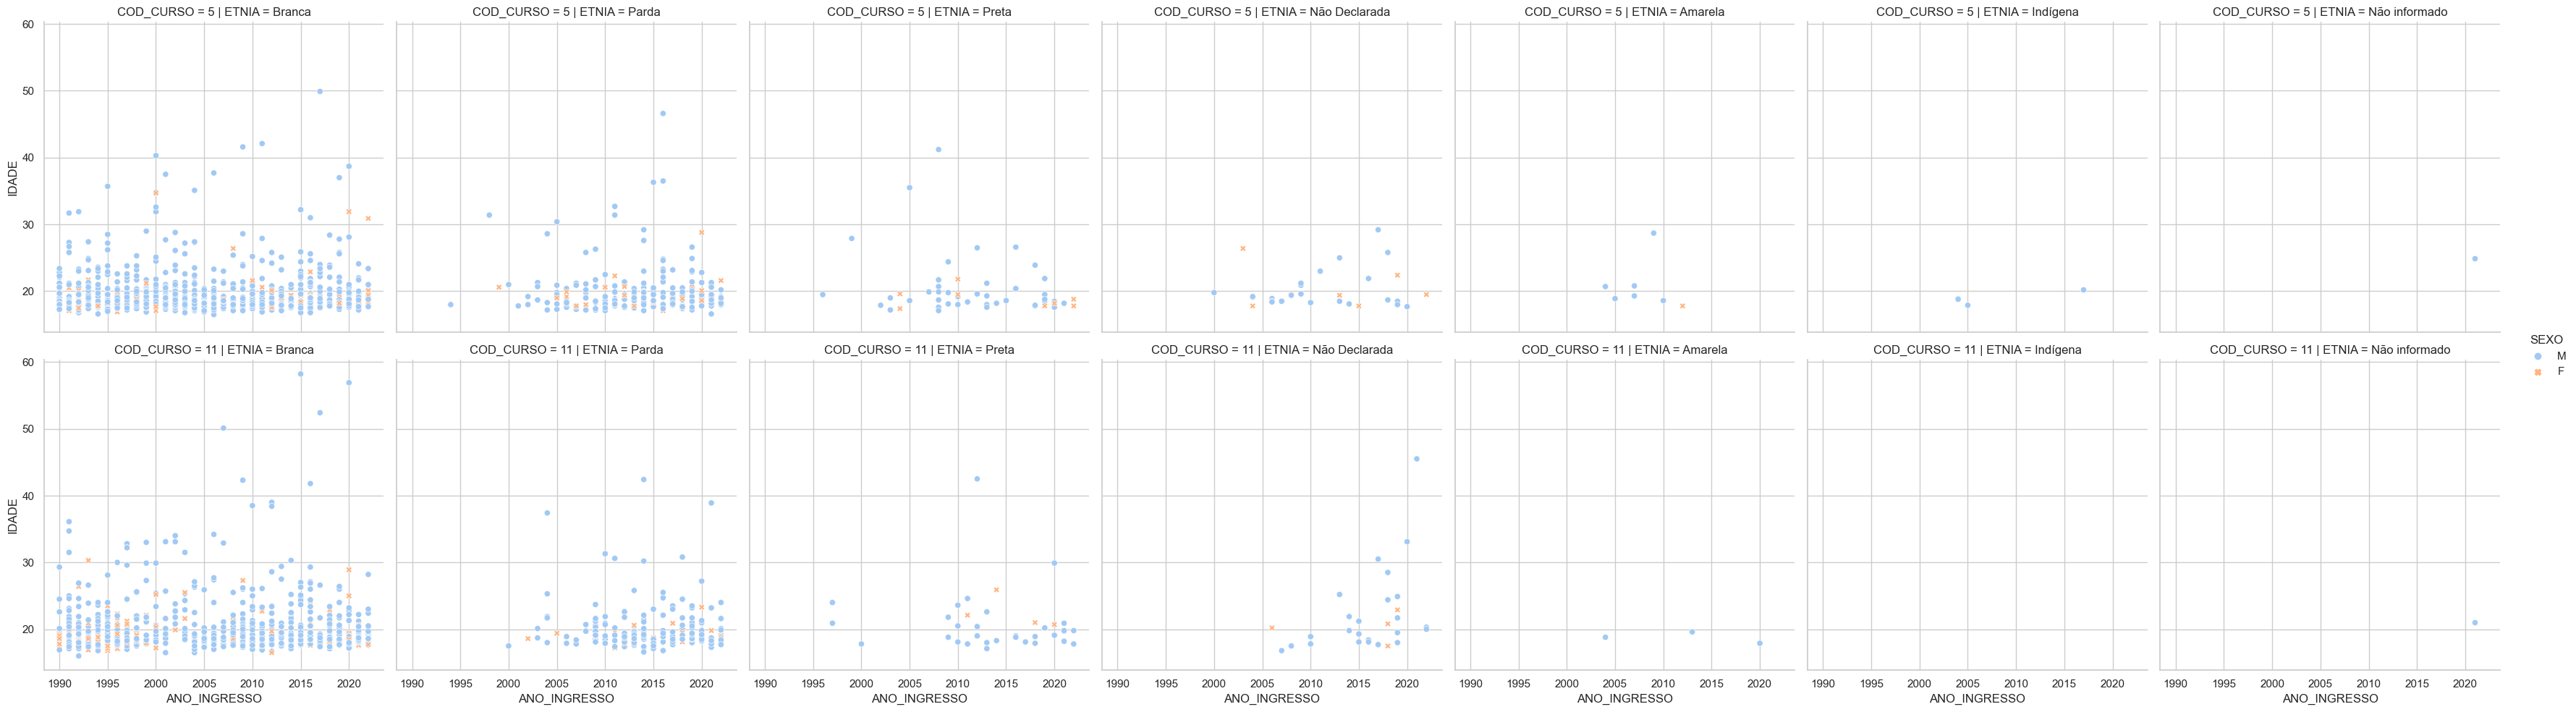

In [85]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="ETNIA",hue="SEXO",row="COD_CURSO",style="SEXO")

Text(0.5, 1.0, 'Distribuição de Etnias')

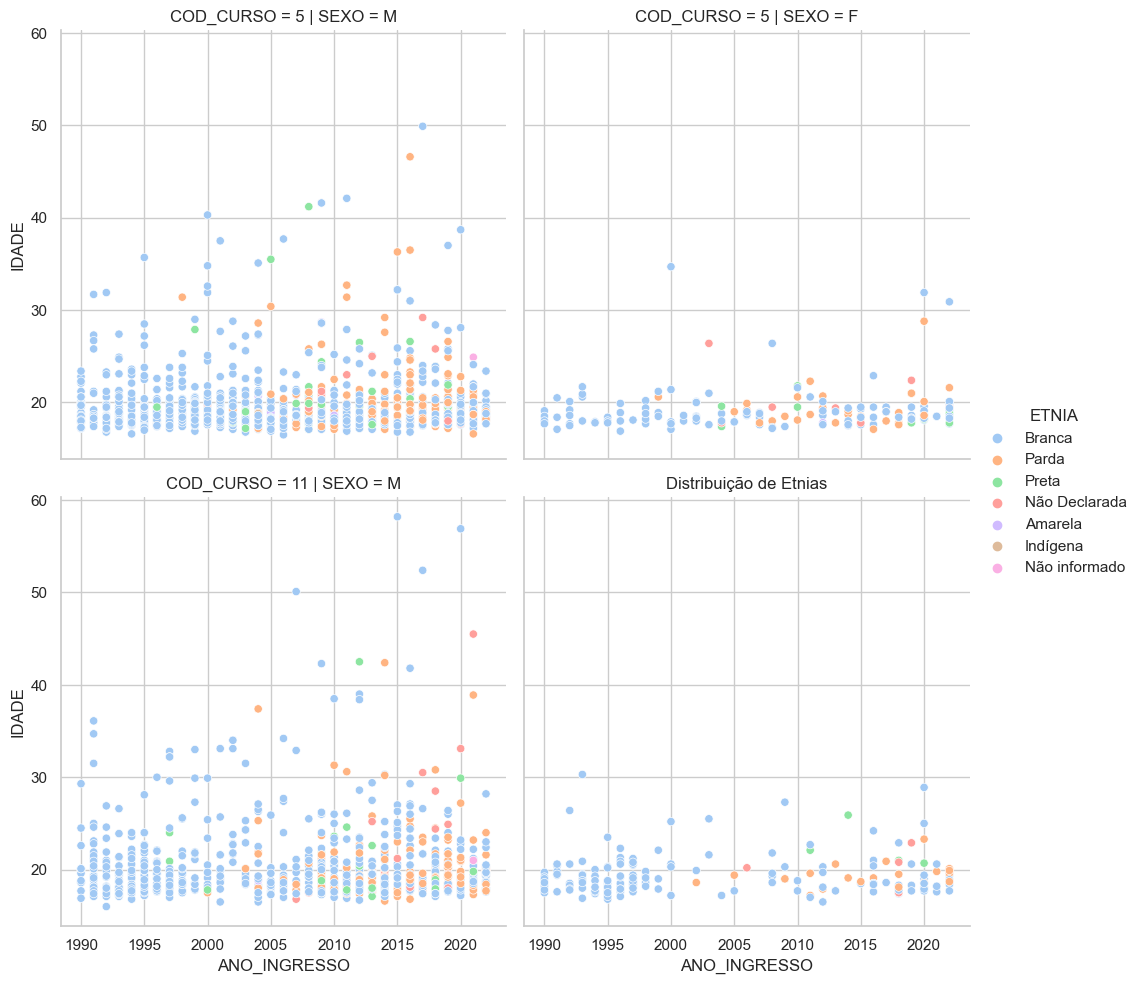

In [88]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE",col="SEXO",hue="ETNIA",row="COD_CURSO")
plt.title('Distribuição de Etnias')

In [27]:
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="SEXO",hue="ETNIA",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="ETNIA",hue="SEXO",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",hue="Forna de Evasão",row="COD_CURSO")
#sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="COD_CURSO",hue="SEXO")
#sns.displot(df, x="ANO_INGRESSO", hue="Forna de Evasão", kind="ecdf",col="SEXO")
#sns.displot(df, x="CRA", hue="Forna de Evasão", kind="ecdf",col="SEXO")

# Distribuição de Gêneros

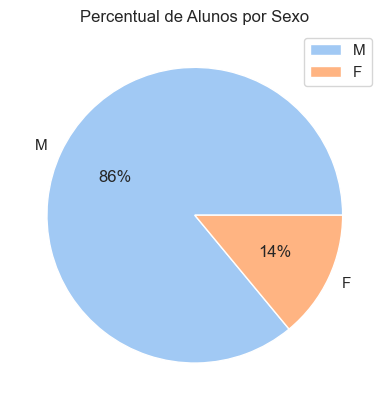

In [8]:
pie_plot(df, 'SEXO', "Percentual de Alunos por Sexo")

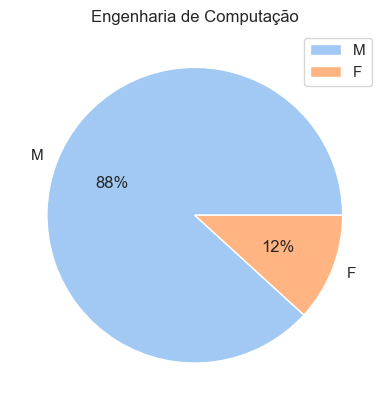

In [78]:
pie_plot(eng, 'SEXO', "Engenharia de Computação")

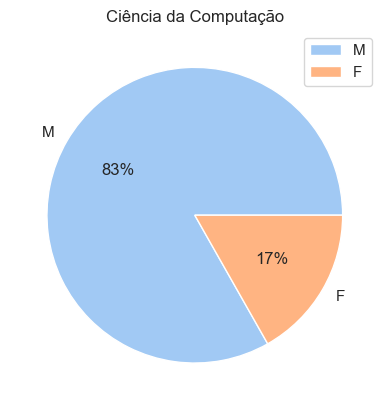

In [79]:
pie_plot(ccomp, 'SEXO', 'Ciência da Computação')

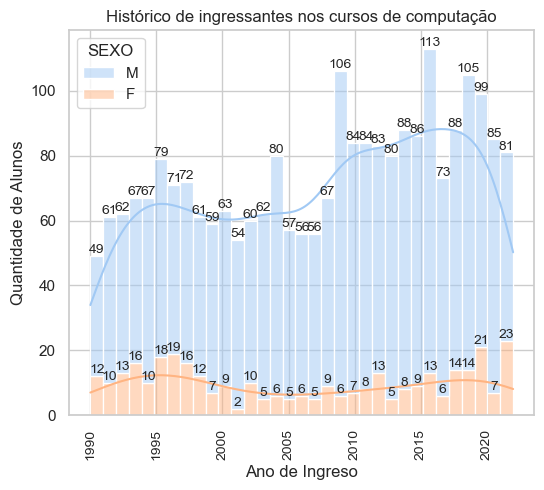

In [81]:
hist_plot(df, 'ANO_INGRESSO', 'Ano de Ingreso', 'Histórico de ingressantes nos cursos de computação')

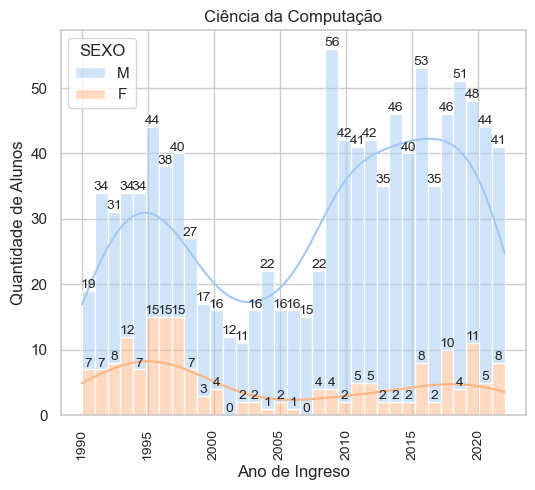

In [82]:
hist_plot(ccomp, 'ANO_INGRESSO', 'Ano de Ingreso', 'Ciência da Computação')

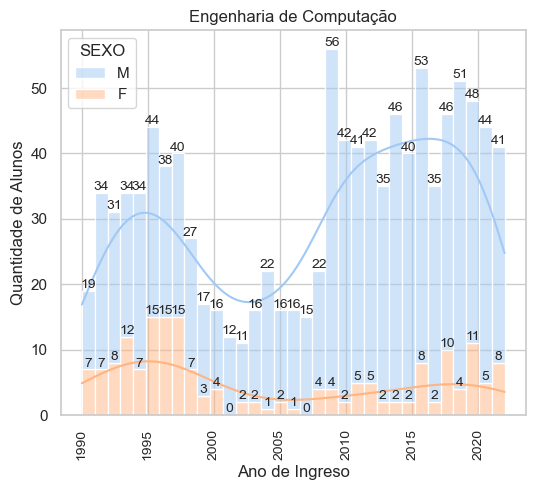

In [83]:
hist_plot(ccomp, 'ANO_INGRESSO', 'Ano de Ingreso', 'Engenharia de Computação')

# Idade - Medidas de Centralidade

In [84]:
df_idade = df["IDADE"]
df_idade.describe()

count    2451.000000
mean       19.975561
std         3.696133
min        16.000000
25%        18.100000
50%        18.900000
75%        20.300000
max        58.200000
Name: IDADE, dtype: float64

In [15]:
df.groupby("SEXO")['IDADE'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,342.0,19.331871,2.305408,16.5,18.0,18.7,19.8,34.7
M,2109.0,20.079943,3.865220,16.0,18.1,18.9,20.4,58.2


In [16]:
ccomp.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,1374,1376,Aluno 1377,M,18.5,Solteiro(a),Branca,11.0,Ciência da Computação,2009.0,...,13.0,3590.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1375,1377,Aluno 1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1376,1378,Aluno 1379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1377,1379,Aluno 1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1378,1380,Aluno 1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,2453,2456,Aluno 2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,2454,2457,Aluno 2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,2455,2458,Aluno 2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,2456,2459,Aluno 2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
eng.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,0,0,Aluno 1,M,17.8,Solteiro(a),Branca,5.0,Engenharia de Computação,2016.0,...,18.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1,1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1369,1371,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,1370,1372,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,1371,1373,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,1372,1374,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
femi.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,14,14,Aluno 1007,F,18.5,Solteiro(a),Branca,11.0,Ciência da Computação,2022.0,...,15.0,2910.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,19,19,Aluno 1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,20,Aluno 1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,43,Aluno 1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,46,Aluno 1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2389,2392,Aluno 970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2392,2395,Aluno 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,2424,2427,Aluno 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2448,2451,Aluno 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cc_femi.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,1375,1377,Aluno 1378,F,18.5,Solteiro(a),Branca,11.0,Ciência da Computação,1995.0,...,16.0,2910.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1382,1384,Aluno 1385,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1385,1387,Aluno 1388,NaN,NaN,NaN,NaN,NaN,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393,1395,Aluno 1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1397,1399,Aluno 1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2389,2392,Aluno 2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2392,2395,Aluno 2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,2424,2427,Aluno 2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,2448,2451,Aluno 2452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
eng_femi.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,14,14,Aluno 1007,F,17.8,Solteiro(a),Branca,5.0,Engenharia de Computação,2022.0,...,15.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,3.0
1,19,19,Aluno 1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,20,20,Aluno 1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,43,Aluno 1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,46,Aluno 1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1328,1330,Aluno 970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,1335,1337,Aluno 983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,1337,1339,Aluno 984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,1349,1351,Aluno 985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
masc.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,0,0,Aluno 1,M,18.1,Solteiro(a),Branca,5.0,Engenharia de Computação,2009.0,...,15.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1,1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,2453,2456,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,2454,2457,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,2455,2458,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2112,2456,2459,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
eng_masc.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,0,0,Aluno 1,M,18.1,Solteiro(a),Branca,5.0,Engenharia de Computação,2016.0,...,18.0,3690.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1,1,Aluno 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Aluno 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Aluno 1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Aluno 1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1369,1371,Aluno 995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,1370,1372,Aluno 996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,1371,1373,Aluno 997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1210,1372,1374,Aluno 998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cc_masc.mode()

,Unnamed: 0.1,Unnamed: 0,NOME_ALUNO,SEXO,IDADE,ESTADO_CIVIL,ETNIA,COD_CURSO,NOME_CURSO,ANO_INGRESSO,...,NUM_MAX_PERIODOS,CH_TOTAL_CURSO,COTISTA,MUNICIPIO,ESTADO,PAIS,CRN,CRA,QTDE_TRANCAMENTOS,TEMPO_NA_UFES
0,1374,1376,Aluno 1377,M,17.8,Solteiro(a),Branca,11.0,Ciência da Computação,2009.0,...,13.0,3590.0,N,VITORIA,Espirito Santo,Brasil,5,0.0,0.0,5.0
1,1376,1378,Aluno 1379,NaN,18.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1377,1379,Aluno 1380,NaN,18.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1378,1380,Aluno 1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1379,1381,Aluno 1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,2453,2456,Aluno 2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,2454,2457,Aluno 2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,2455,2458,Aluno 2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,2456,2459,Aluno 2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


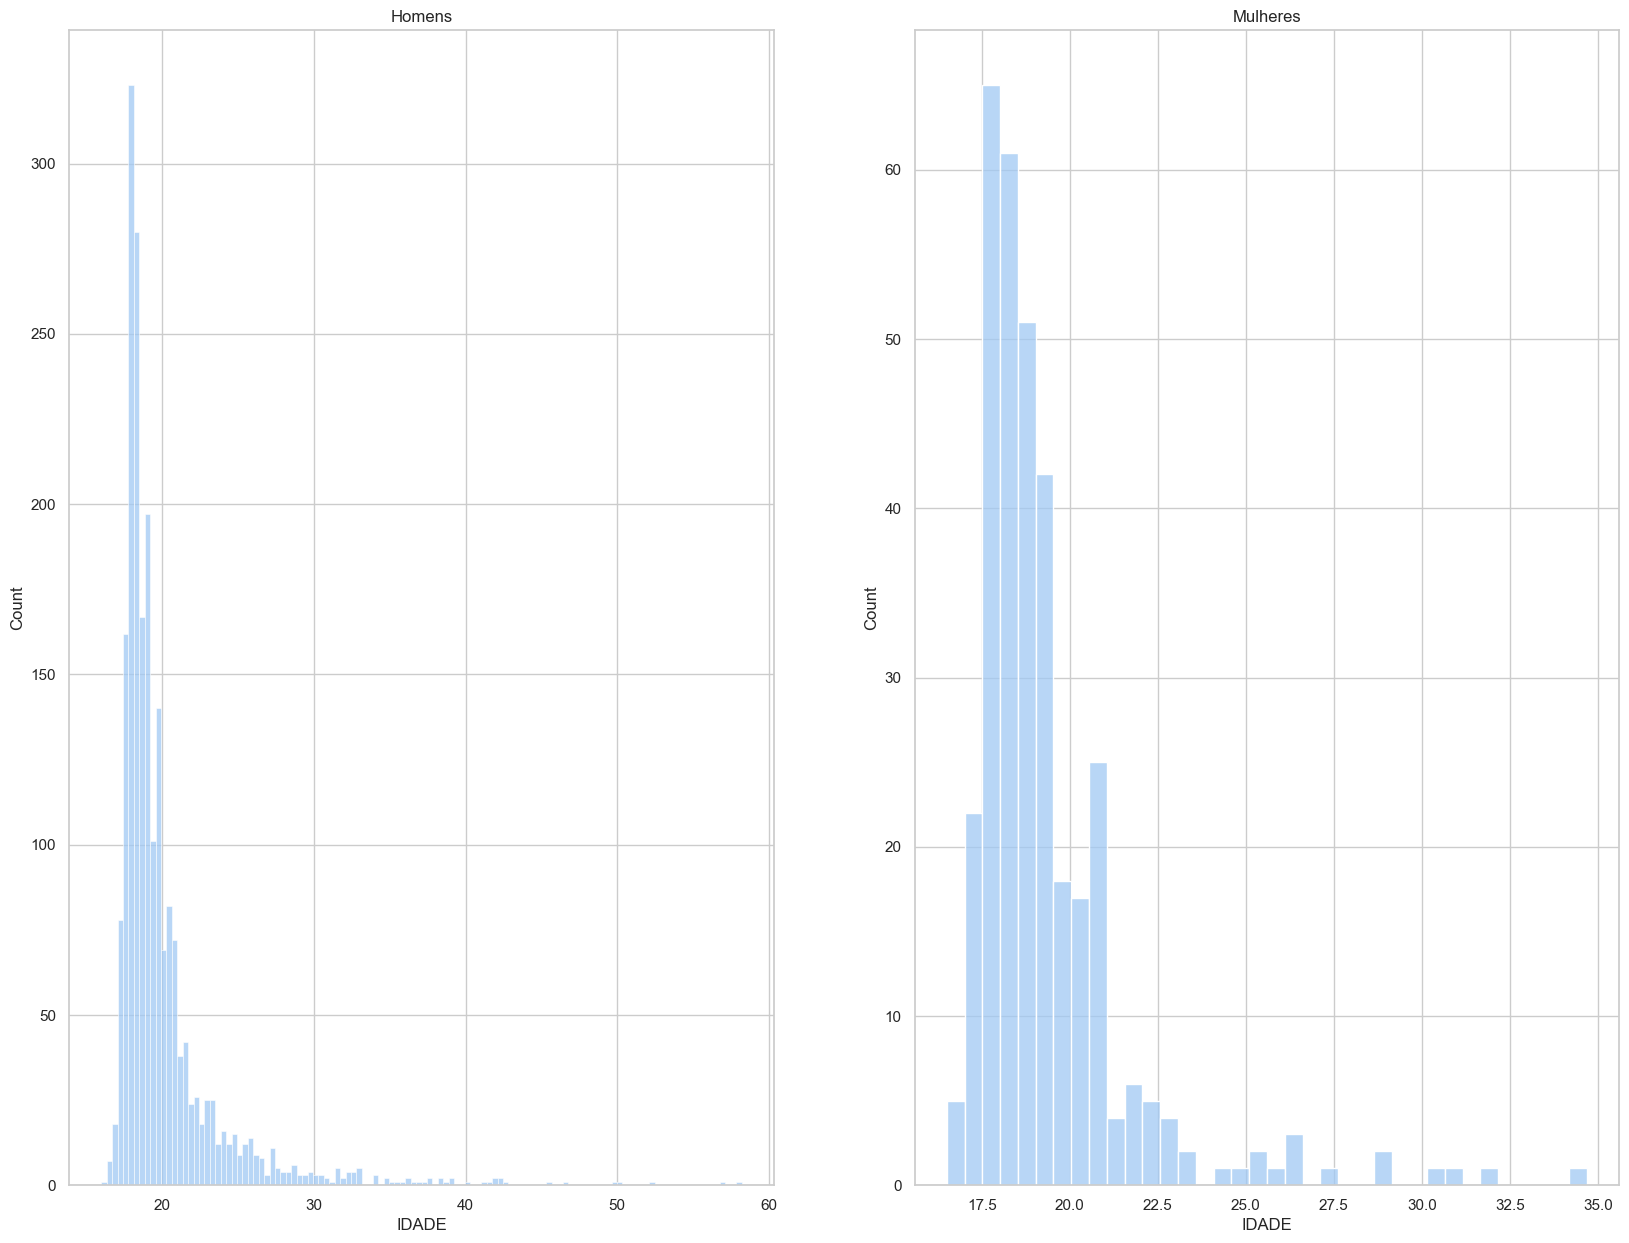

In [24]:
comparative_hist_plots(df)

# Tabelas de Contigência

In [50]:
tab_ingresso, tabper_ingresso = crosstabper_linha(df,"ANO_INGRESSO")
tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,24.489796,75.510204
1991,16.393443,83.606557
1992,20.967742,79.032258
1993,23.880597,76.119403
1994,14.925373,85.074627
1995,22.784810,77.215190
1996,26.760563,73.239437
1997,22.222222,77.777778
1998,19.672131,80.327869


In [51]:
tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,14.176485,85.823515
std,6.657434,6.657434
min,3.703704,71.604938
25%,8.771930,80.327869
50%,13.333333,86.666667
75%,19.672131,91.228070
max,28.395062,96.296296


In [52]:
ec_tab_ingresso, ec_tabper_ingresso = crosstabper_linha(eng,"ANO_INGRESSO")
ec_tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,16.666667,83.333333
1991,11.111111,88.888889
1992,16.129032,83.870968
1993,12.121212,87.878788
1994,9.090909,90.909091
1995,8.571429,91.428571
1996,12.121212,87.878788
1997,3.125000,96.875000
1998,14.705882,85.294118


In [53]:
ec_tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,11.836669,88.163331
std,6.377183,6.377183
min,3.125000,62.500000
25%,8.333333,85.294118
50%,11.111111,88.888889
75%,14.705882,91.666667
max,37.500000,96.875000


In [54]:
cc_tab_ingresso, cc_tabper_ingresso = crosstabper_linha(ccomp,"ANO_INGRESSO")
cc_tabper_ingresso

SEXO,F,M
ANO_INGRESSO,,
1990,36.842105,63.157895
1991,20.588235,79.411765
1992,25.806452,74.193548
1993,35.294118,64.705882
1994,20.588235,79.411765
1995,34.090909,65.909091
1996,39.473684,60.526316
1997,37.500000,62.500000
1998,25.925926,74.074074


In [55]:
sliced = eng[eng["ANO_INGRESSO"] >= 2014]
sliced = sliced[sliced['ANO_INGRESSO'] < 2021]
sliced_ingresso, sliced_ingresso_per = crosstabper_linha(sliced,"ANO_INGRESSO")

In [56]:
sliced_ingresso_per.describe()

SEXO,F,M
count,7.000000,7.000000
mean,13.716132,86.283868
std,4.417360,4.417360
min,8.333333,80.392157
25%,10.025063,83.132045
50%,14.285714,85.714286
75%,16.867955,89.974937
max,19.607843,91.666667


In [57]:
cc_tabper_ingresso.describe()

SEXO,F,M
count,33.000000,33.000000
mean,16.550484,83.449516
std,11.341735,11.341735
min,0.000000,60.526316
25%,6.250000,77.083333
50%,15.094340,84.905660
75%,22.916667,93.750000
max,39.473684,100.000000


### Forma de Evasão - Geral

In [58]:
tab_evasao, tabper_evasao = crosstabper(df,"FORMA_EVASAO")
tabper_evasao

SEXO,F,M
FORMA_EVASAO,,
Cursando,22.093023,18.164617
Desistência,17.151163,17.407758
Desligado,15.116279,24.550615
Falecimento,0.000000,0.047304
Formado,41.279070,35.004730
Reopção,2.034884,2.790918
Transferência,2.325581,2.034059


In [59]:
stat, p, dof, expected = chi2_contingency(tab_evasao)
  
alpha = 0.05
print("Geral")
print("p valor é " + str(p))
if p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Geral
p valor é 0.00636795474579937
Dependência (rejeita H0)


In [60]:
stacked = tabper_evasao.stack().reset_index().rename(columns={0:'value'})
sorted = stacked.sort_values(['value',"FORMA_EVASAO"],ascending=False)

In [61]:
palette ={"M": "C0", "F": "C1"}

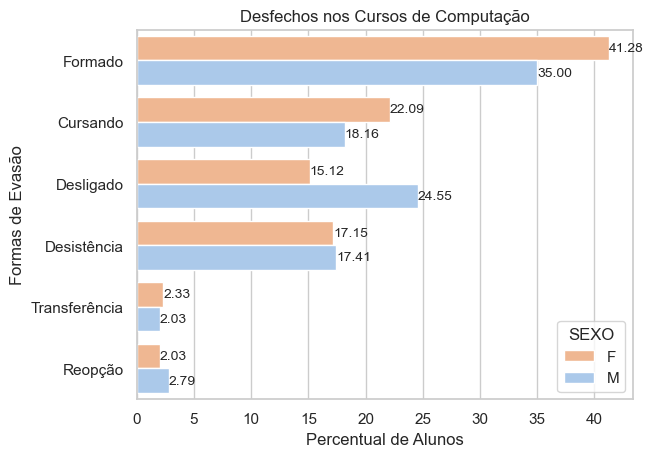

In [62]:
cc_tab_evasao, ccomp_tabper = crosstabper(ccomp,  'FORMA_EVASAO')
ccomp_stacked = ccomp_tabper.stack().reset_index().rename(columns={0:'value'})
ccomp_sorted = ccomp_stacked.sort_values(by=["SEXO", "value", 'FORMA_EVASAO'], ascending=[True, False, False])
ccomp_order = list(ccomp_sorted["FORMA_EVASAO"].unique())

ax = sns.barplot(x=sorted.value, y=sorted["FORMA_EVASAO"], hue=sorted.SEXO, palette=palette,order=ccomp_order)
ax.set_title("Desfechos nos Cursos de Computação")
ax.set_ylabel("Formas de Evasão")
ax.set_xlabel("Percentual de Alunos")
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f',fontsize=10)

### Forma de Evasão - por Curso

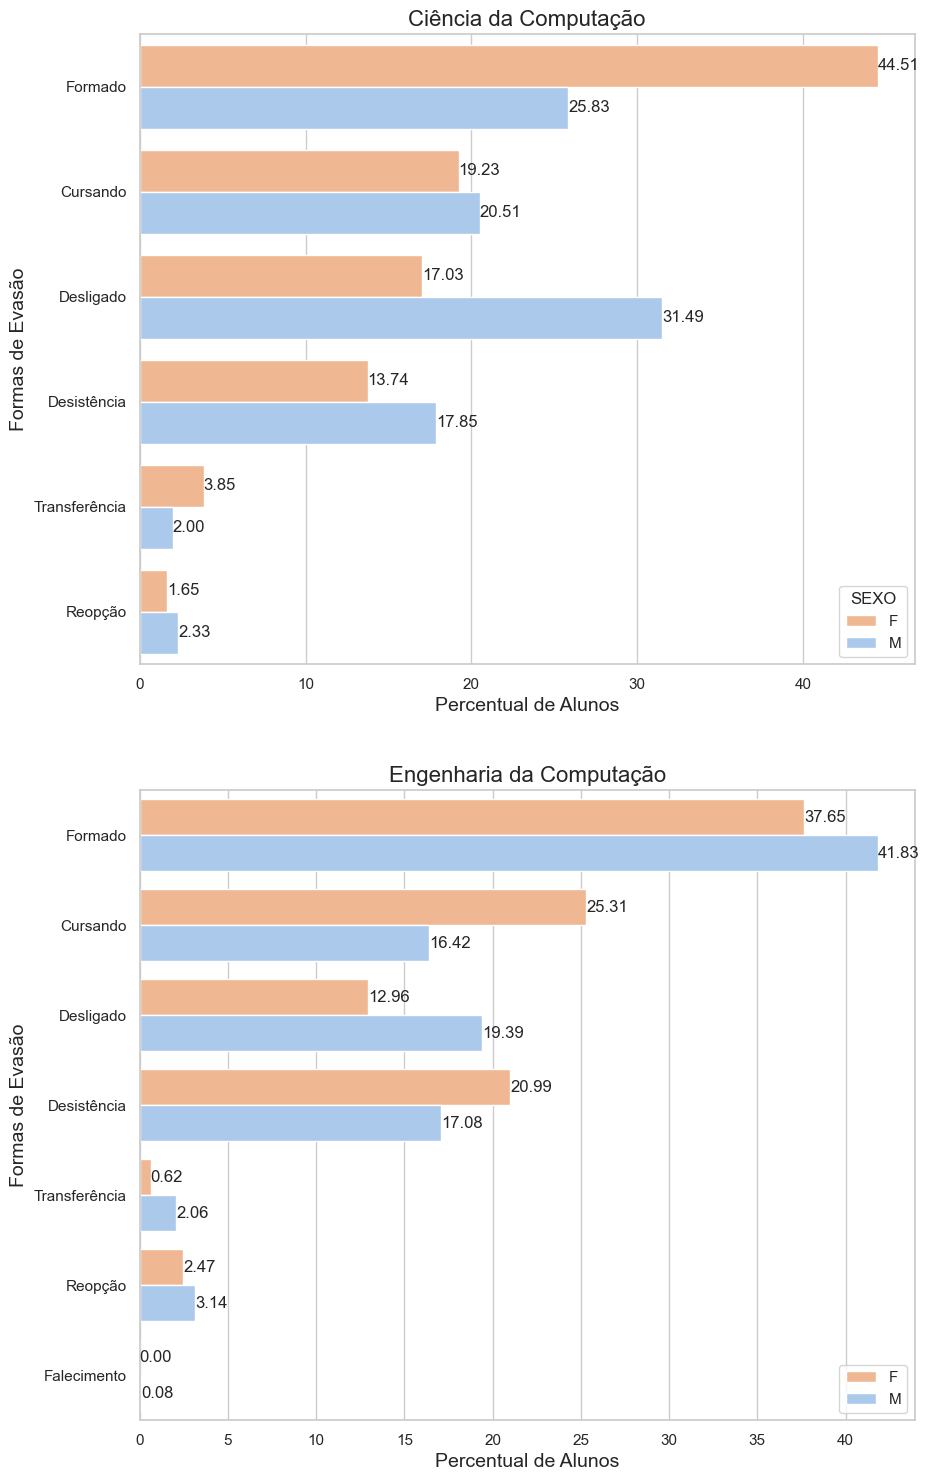

In [63]:
comparative_bar_plots(ccomp, eng, 'FORMA_EVASAO',"Formas de Evasão",palette)

In [64]:
cc_stat, cc_p, cc_dof, cc_expected = chi2_contingency(cc_tab_evasao)

ec_tab_evasao, ec_tab_per_evasao = crosstabper(eng, 'FORMA_EVASAO')
ec_stat, ec_p, ec_dof, ec_expected = chi2_contingency(ec_tab_evasao)

print("Ciência")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

print("Engenharia")
print("p valor é " + str(ec_p))
if ec_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Ciência
p valor é 3.2847192200085672e-06
Dependência (rejeita H0)
Engenharia
p valor é 0.03711882628015684
Dependência (rejeita H0)


### Cotista - Geral

In [65]:
tab_cota, tabper_cota = crosstabper(df,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
N,82.848837,81.078524
S,17.151163,18.921476


In [66]:
tab_cota, tabper_cota = crosstabper_linha(cotistas,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,12.854031,87.145969


In [67]:
tab_cota, tabper_cota = crosstabper_linha(cotas_cc,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,10.0,90.0


In [68]:
tab_cota, tabper_cota = crosstabper_linha(cotas_eng,"COTISTA")
tabper_cota

SEXO,F,M
COTISTA,,
S,15.057915,84.942085


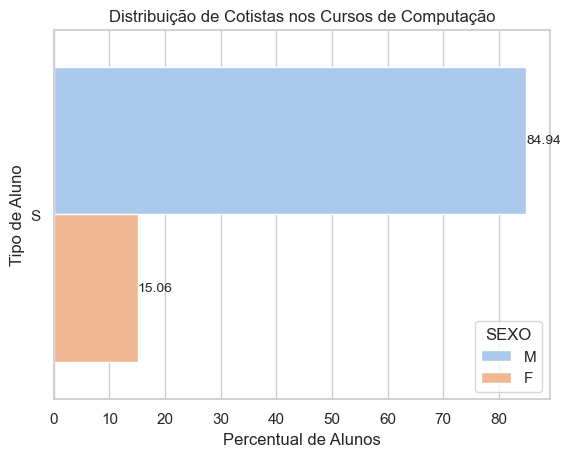

In [69]:
cotas_stacked = tabper_cota.stack().reset_index().rename(columns={0:'value'})
cotas_sorted = cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)
ax = sns.barplot(x=cotas_sorted.value, y=cotas_sorted["COTISTA"], hue=cotas_sorted.SEXO)
ax.set_title("Distribuição de Cotistas nos Cursos de Computação")
ax.set_ylabel("Tipo de Aluno")
ax.set_xlabel("Percentual de Alunos")
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f',fontsize=10)

In [70]:
comp_stat, comp_p, comp_dof, comp_expected = chi2_contingency(tab_cota)


print("Geral")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Geral
p valor é 3.2847192200085672e-06
Dependência (rejeita H0)


### Cotas - Por Curso

In [71]:
cc_tab_cota, cc_tabper_cota = crosstabper(ccomp,"COTISTA")
cc_tabper_cota

SEXO,F,M
COTISTA,,
N,89.010989,80.044346
S,10.989011,19.955654


In [72]:
eng_tab_cota, eng_tabper_cota = crosstabper(eng,"COTISTA")
eng_tabper_cota

SEXO,F,M
COTISTA,,
N,75.925926,81.848185
S,24.074074,18.151815


In [73]:
cc_stat, cc_p, cc_dof, cc_expected = chi2_contingency(cc_tab_cota)

ec_stat, ec_p, ec_dof, ec_expected = chi2_contingency(eng_tab_cota)

print("Ciência")
print("p valor é " + str(cc_p))
if cc_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

print("Engenharia")
print("p valor é " + str(ec_p))
if ec_p <= alpha:
    print('Dependência (rejeita H0)')
else:
    print('Independência')

Ciência
p valor é 0.006144041424037965
Dependência (rejeita H0)
Engenharia
p valor é 0.0885390085047568
Independência


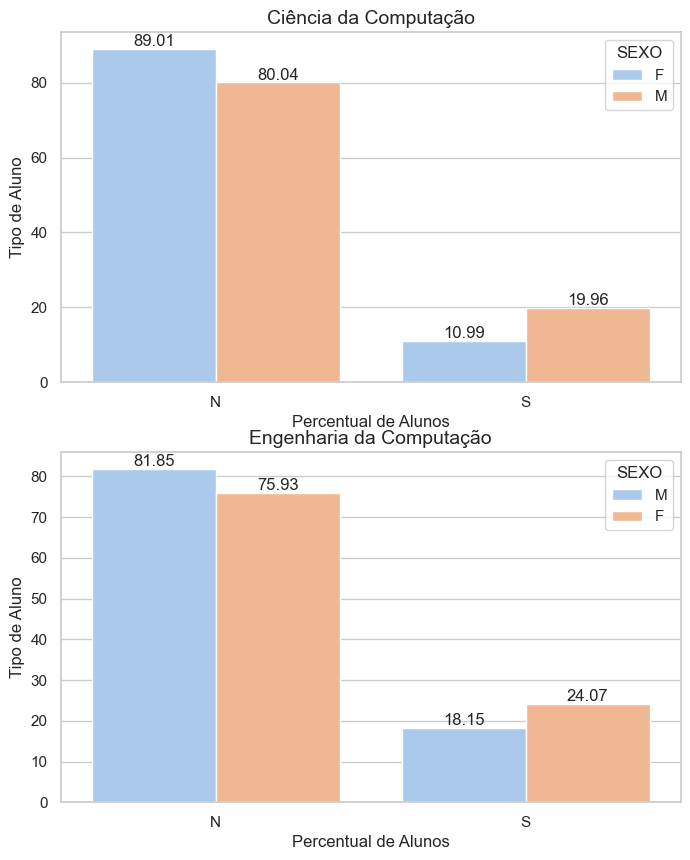

In [74]:
cc_tab_cota, cc_tabper_cota = crosstabper(ccomp,"COTISTA")
eng_tab_cota, eng_tabper_cota = crosstabper(eng,"COTISTA")

cc_cotas_stacked = cc_tabper_cota.stack().reset_index().rename(columns={0:'value'})
cc_cotas_sorted = cc_cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)

eng_cotas_stacked = eng_tabper_cota.stack().reset_index().rename(columns={0:'value'})
eng_cotas_sorted = eng_cotas_stacked.sort_values(['value',"COTISTA"],ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(8,10))
sns.barplot(x=cc_cotas_sorted["COTISTA"], y=cc_cotas_sorted.value, hue=cc_cotas_sorted.SEXO,ax=axs[0])
sns.barplot( x=eng_cotas_sorted["COTISTA"], y=eng_cotas_sorted.value, hue=eng_cotas_sorted.SEXO,ax=axs[1])
axs[0].set_title("Ciência da Computação", fontsize=14)
axs[0].set_ylabel("Tipo de Aluno")
axs[0].set_xlabel("Percentual de Alunos")
for i in axs[0].containers:
    axs[0].bar_label(i,fmt='%.2f')
axs[1].set_title("Engenharia da Computação", fontsize=14)
axs[1].set_ylabel("Tipo de Aluno")
axs[1].set_xlabel("Percentual de Alunos")
for i in axs[1].containers:
    axs[1].bar_label(i,fmt='%.2f')

plt.show()

In [75]:
tab_etnia, tabper_etnia = crosstabper(eng,"ETNIA")
tabper_etnia

SEXO,F,M
ETNIA,,
Amarela,0.617284,0.495050
Branca,70.370370,76.815182
Indígena,0.000000,0.330033
Não Declarada,4.320988,1.897690
Não informado,0.000000,0.082508
Parda,19.753086,16.831683
Preta,4.938272,3.547855


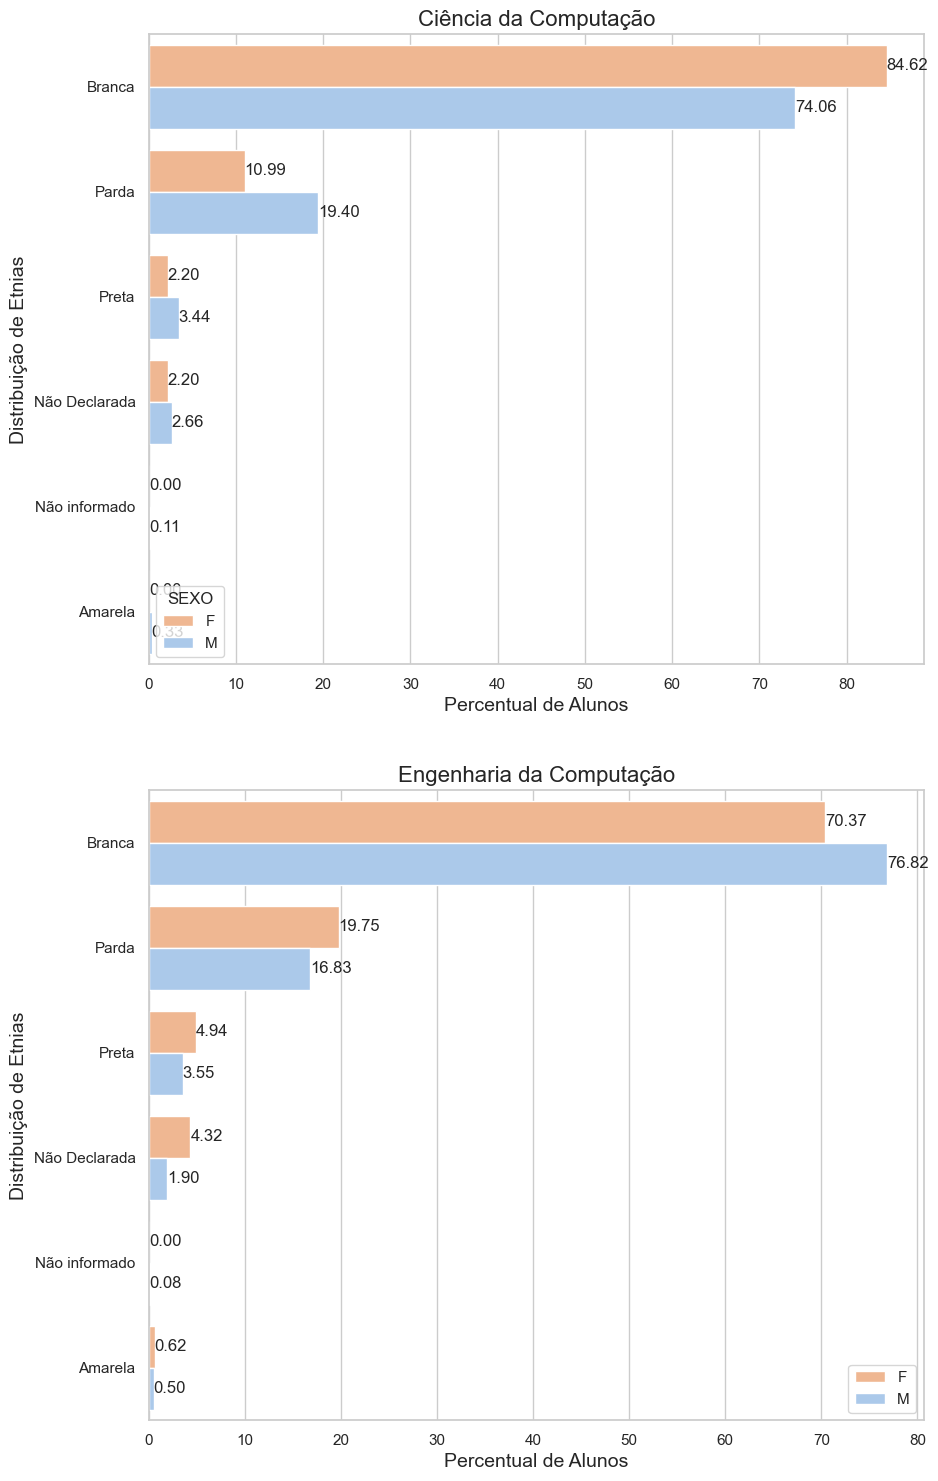

In [76]:
comparative_bar_plots(ccomp, eng, 'ETNIA', "Distribuição de Etnias", palette)

TypeError: can't multiply sequence by non-int of type 'float'

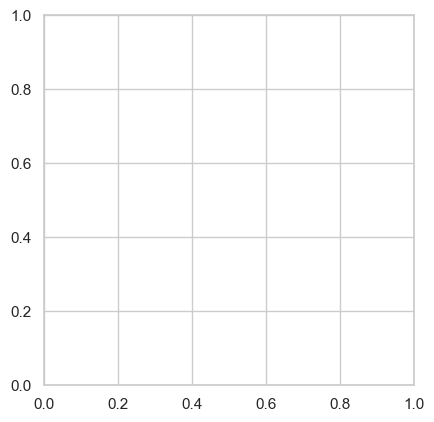

In [77]:
plt.pie(cc_femi.ETNIA.value_counts(), cc_femi.ETNIA.unique(),)

In [ ]:
tab_estadocivil, tabper_estadocivil = crosstabper(df,"ESTADO_CIVIL")
tabper_estadocivil

In [ ]:
tab_municipio, tabper_municipio = crosstabper(df,"MUNICIPIO")
tabper_municipio

In [ ]:
tab_estado, tabper_estado = crosstabper(df,"ESTADO")
tabper_estado

# Tempo na UFES

In [30]:
formados.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,142.0,5.387324,1.610465,0.0,4.0,5.0,6.0,13.0
M,740.0,5.820270,1.621530,1.0,5.0,5.0,7.0,14.0


In [31]:
formados_cc.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,81.0,5.172840,1.081551,3.0,4.0,5.0,6.0,8.0
M,233.0,5.648069,1.544096,1.0,5.0,5.0,7.0,10.0


In [32]:
formados_ec.groupby("SEXO")["TEMPO_NA_UFES"].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
F,61.0,5.672131,2.095402,0.0,4.0,5.0,7.0,13.0
M,507.0,5.899408,1.651368,1.0,5.0,6.0,7.0,14.0
